In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# K-means法によるクラスタリング

## K-means法の例

In [3]:
df = pd.read_csv("data7.csv",header=None)
df.columns = ["x1","x2","y"]
df = df.drop(columns=["y"])
df

,x1,x2
0,1.77,2.67
1,3.72,4.03
2,6.66,2.89
3,8.51,1.98
4,0.53,2.98
...,...,...
295,8.51,2.51
296,1.47,2.96
297,5.18,5.09
298,5.58,1.28


In [4]:
from sklearn.cluster import KMeans

In [16]:
n_clusters=4
model = KMeans(n_clusters=n_clusters)
model.fit(df)

pred = model.predict(df)
df["pred"] = pred
center = model.cluster_centers_[:,:2]

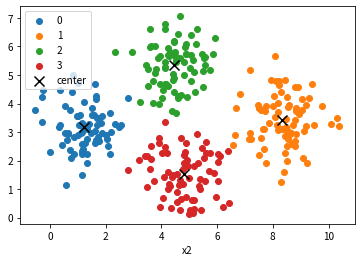

In [27]:
plt.figure(facecolor="white")
# クラスごとに色分けして描画
for i in range(n_clusters):
    plt.scatter(df.loc[df["pred"]==i,"x1"],df.loc[df["pred"]==i,"x2"],label=str(i))

plt.scatter(center[:,:1],center[:,1:2],color="black",marker="x",s=100,label="center")
plt.xlabel("x1")
plt.xlabel("x2")
plt.legend()
plt.show()

## n_clustersを変化させたときのクラス分けの違い

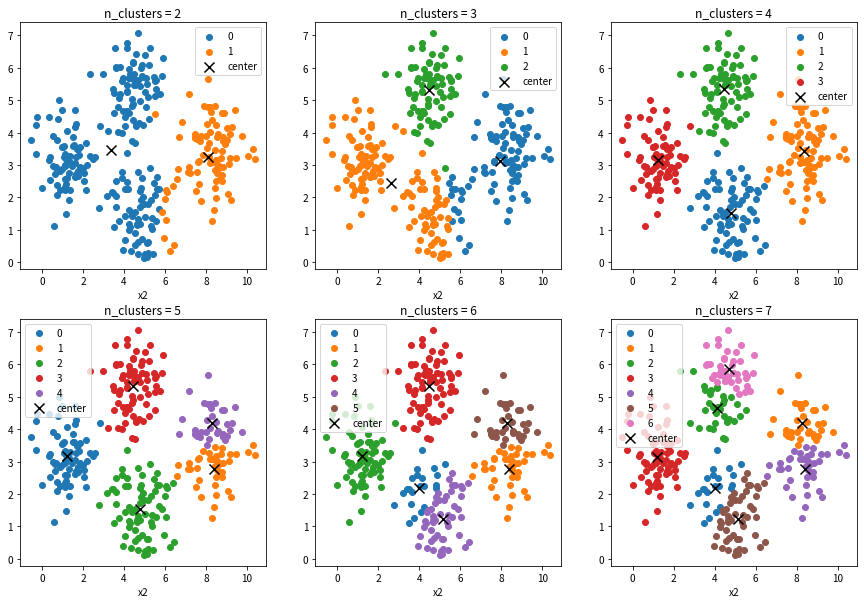

In [38]:
plt.figure(facecolor="white",figsize=(15,10))
i = 1
for n_clusters in range(2,8):
    model = KMeans(n_clusters=n_clusters)
    model.fit(df)

    pred = model.predict(df)
    df["pred"] = pred
    center = model.cluster_centers_[:,:2]
    # クラスごとに色分けして描画
    plt.subplot(2,3,i)
    for i in range(n_clusters):
        plt.scatter(df.loc[df["pred"]==i,"x1"],df.loc[df["pred"]==i,"x2"],label=str(i))

    plt.scatter(center[:,:1],center[:,1:2],color="black",marker="x",s=100,label="center")
    plt.xlabel("x1")
    plt.xlabel("x2")
    plt.title("n_clusters = "+str(n_clusters))
    plt.legend()
    i=i+1
plt.show()